In [143]:
import numpy as np
import pandas as pd
import math
import pickle
import matplotlib.pyplot as plt
import statsmodels.stats.multitest as smm
import seaborn as sns
%matplotlib inline

# Load the meta information
with open(os.path.join('nanoGPT-master/test_data_crap_pw_0.2.pkl'), 'rb') as f:
    out = pickle.load(f)

In [109]:
def print2Smallest(arr):
 
    # There should be atleast two elements
    arr_size = len(arr)
    if arr_size < 2:
        print("Invalid Input")
        return
 
    first = second = math.inf
    for i in range(0, arr_size):
 
        # If current element is smaller than first then
        # update both first and second
        if arr[i] < first:
            second = first
            first = arr[i]
 
        # If arr[i] is in between first and second then
        # update second
        elif (arr[i] < second and arr[i] != first):
            second = arr[i]
 
    if (second == math.inf):
        print("No second smallest element")
    else:
        print('The smallest element is', first, 'and',
              ' second smallest element is', second)
    return(first, second)
 

In [158]:
p = []
contingency = []
for key, value in out.items():
    p.append(value['p'])
    contingency.append(value['contingency'])
f, s = print2Smallest(p)
# make sure there is no zero due to float
p_values = np.array([s if i == 0 else i for i in p])

corrected_p_values = smm.multipletests(p_values, alpha=0.05, method='fdr_bh')

rejected, p_values_corrected, _, _ = corrected_p_values
rejected_count = sum(rejected)
highlight_indices = np.where(rejected)[0]  # Use [0] to get the array from the tuple

The smallest element is 4.65476406864858e-267 and  second smallest element is 4.7990888668248564e-172


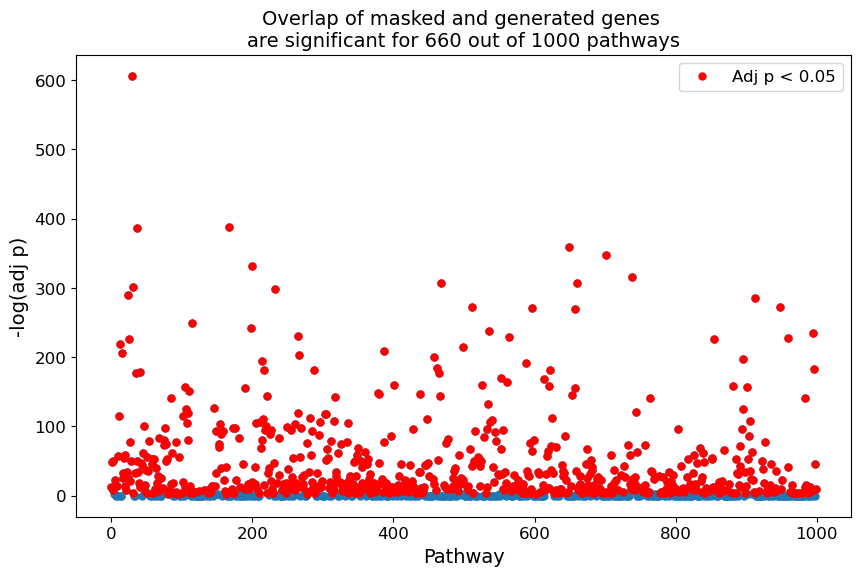

In [164]:


# Create a plot
plt.figure(figsize=(10, 6))

# Adjust default settings to increase sizes
plt.rcParams['axes.labelsize'] = 14  # Increase axis label size
plt.rcParams['axes.titlesize'] = 14  # Increase title size
plt.rcParams['xtick.labelsize'] = 12  # Increase x-axis tick label size
plt.rcParams['ytick.labelsize'] = 12  # Increase y-axis tick label size
plt.rcParams['legend.fontsize'] = 12  # Increase legend font size
plt.rcParams['lines.linewidth'] = 2  # Increase line width
plt.rcParams['lines.markersize'] = 8  # Increase marker size

# Plot all points
plt.plot(-np.log(p_values_corrected), marker='o', linestyle='none', markersize=5)
plt.plot(highlight_indices, -np.log(p_values_corrected[highlight_indices]), 'ro', markersize=5, label='Adj p < 0.05')
plt.xlabel('Pathway')
plt.ylabel('-log(adj p)')
plt.legend()

# Display the count of p < 0.05
count_p_less_05 = np.sum(highlight)
plt.title(f'Overlap of masked and generated genes \nare significant for {rejected_count} out of {len(p_new)} pathways')
plt.savefig('mask80_1000_pathways.png', dpi=300)
plt.show()